### TASK: SUPPORT VECTOR MACHINES (SVM)

To Prepare a classification model using SVM for salary data 

IMPORTING LIBRARIES

In [5]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing


IMPORTING DATA

In [6]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


In [7]:
df=pd.read_csv('SalaryData_Train(1).csv')

In [8]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [9]:
df2=pd.read_csv('SalaryData_Test(1).csv')

In [10]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [14]:
df.shape

(30161, 14)

In [15]:
df2.shape

(15060, 14)

In [16]:
data=df.copy()

In [17]:
data2=df2.copy()

In [18]:
data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [19]:
le = preprocessing.LabelEncoder()
data['workclass']= le.fit_transform(data['workclass'])
data['maritalstatus']= le.fit_transform(data['maritalstatus'])
data['occupation']= le.fit_transform(data['occupation'])
data['relationship']= le.fit_transform(data['relationship'])
data['race']= le.fit_transform(data['race'])
data['sex']= le.fit_transform(data['sex'])
data['native']= le.fit_transform(data['native'])
data['Salary']= le.fit_transform(data['Salary'])


In [20]:
le = preprocessing.LabelEncoder()
data2['workclass']= le.fit_transform(data2['workclass'])
data2['maritalstatus']= le.fit_transform(data2['maritalstatus'])
data2['occupation']= le.fit_transform(data2['occupation'])
data2['relationship']= le.fit_transform(data2['relationship'])
data2['race']= le.fit_transform(data2['race'])
data2['sex']= le.fit_transform(data2['sex'])
data2['native']= le.fit_transform(data2['native'])
data2['Salary']= le.fit_transform(data2['Salary'])


In [21]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,Bachelors,13,2,3,0,4,1,0,0,13,37,0
2,38,2,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,2,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,2,Bachelors,13,2,9,5,2,0,0,0,40,4,0


In [22]:
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,11th,7,4,6,3,2,1,0,0,40,37,0
1,38,2,HS-grad,9,2,4,0,4,1,0,0,50,37,0
2,28,1,Assoc-acdm,12,2,10,0,4,1,0,0,40,37,1
3,44,2,Some-college,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,10th,6,4,7,1,4,1,0,0,30,37,0


In [23]:
data.drop(['education'],axis=1,inplace=True)

In [24]:
data2.drop(['education'],axis=1,inplace=True)

In [25]:
data.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [26]:
data2.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e833ebf40>,
      dtype=object)

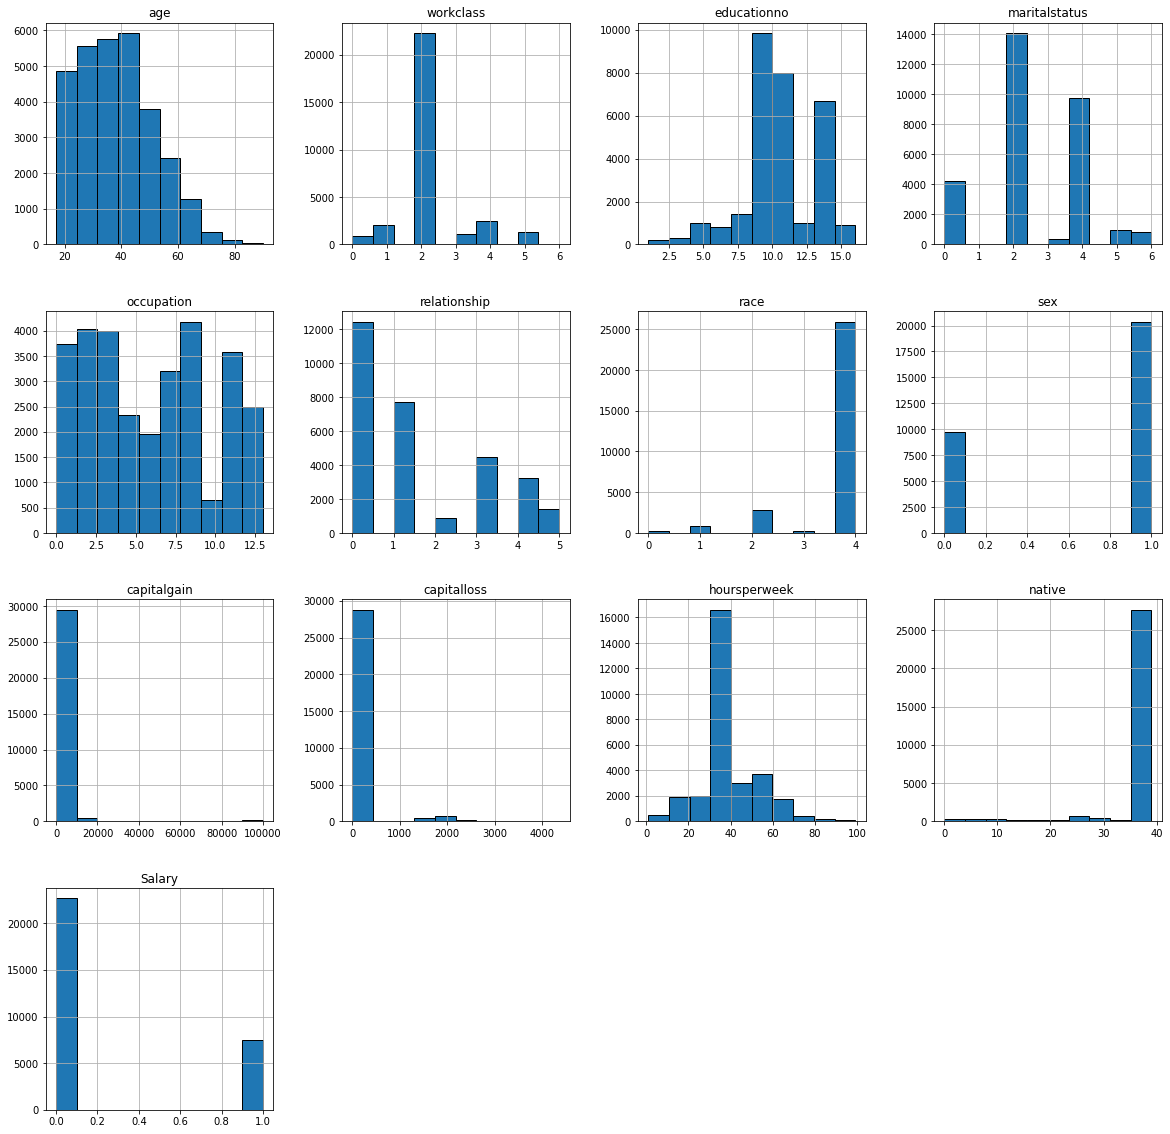

In [27]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1)

In [28]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [29]:
X2=data2.iloc[:,:-1]
Y2=data2.iloc[:,-1]

### Grid Search CV

In [30]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

NameError: ignored

In [ ]:
clf = SVC(C= 10,gamma = 50)
clf.fit(X , Y)
y_pred = clf.predict(X)
acc = accuracy_score(Y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y, y_pred)

In [ ]:
clf = SVC(C= 10,gamma = 50)
clf.fit(X2 , Y2)
y_pred2 = clf.predict(X2)
acc = accuracy_score(Y2, y_pred2) * 100
print("Accuracy =", acc)
confusion_matrix(Y2, y_pred2)

In [ ]:
tpred=clf.predict(X2)

In [ ]:
acc=accuracy_score(Y2,tpred)
acc

In [ ]:
y_pred

In [ ]:
a={'predicted_y':y_pred}
a

In [ ]:
n=pd.DataFrame(a)
n.head()

In [ ]:
n.predicted_y.value_counts()